In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [3]:
out = '.\\out\\'
figsave_format = 'pdf'
figsave_dpi = 200

# Set axtick dimensions
major_size = 6
major_width = 1.2
minor_size = 3
minor_width = 1
mpl.rcParams['xtick.major.size'] = major_size
mpl.rcParams['xtick.major.width'] = major_width
mpl.rcParams['xtick.minor.size'] = minor_size
mpl.rcParams['xtick.minor.width'] = minor_width
mpl.rcParams['ytick.major.size'] = major_size
mpl.rcParams['ytick.major.width'] = major_width
mpl.rcParams['ytick.minor.size'] = minor_size
mpl.rcParams['ytick.minor.width'] = minor_width

# Seaborn style settings
sns.set_style({'axes.axisbelow': True,
               'axes.edgecolor': '.1',
               'axes.facecolor': 'white',
               'axes.grid': True,
               'axes.labelcolor': '.15',
               'axes.spines.bottom': True,
               'axes.spines.left': True,
               'axes.spines.right': True,
               'axes.spines.top': True,
               'figure.facecolor': 'white',
               'font.family': ['sans-serif'],
               'font.sans-serif': ['Arial',
                'DejaVu Sans',
                'Liberation Sans',
                'Bitstream Vera Sans',
                'sans-serif'],
               'grid.color': '.8',
               'grid.linestyle': '--',
               'image.cmap': 'rocket',
               'lines.solid_capstyle': 'round',
               'patch.edgecolor': 'w',
               'patch.force_edgecolor': True,
               'text.color': '.15',
               'xtick.bottom': True,
               'xtick.color': '.15',
               'xtick.direction': 'in',
               'xtick.top': True,
               'ytick.color': '.15',
               'ytick.direction': 'in',
               'ytick.left': True,
               'ytick.right': True})

# Mean and variance

Python offers several alternatives for easy evaluation of the sample mean and variance of data. Let us see e.g., how to solve this problem using numpy. Remember, these two fundamental statistics are defined as 
\begin{eqnarray}
\overline{X} &=& \frac{1}{n}\sum_{i=1}^n x_i, \nonumber \\
S^2 &=& \frac{1}{n-1}\sum_{i=1}^n (x_i - \overline{X})^2 \nonumber
\end{eqnarray}

Let us generate random samples for which we know the true mean and variance, and "check" whether we get something close using the sample mean and variance. E.g., we can generate Normal distributed random numbers with prescribed mean $\mu$ and variance $\sigma^2$:

In [4]:
num_points = 10000

In [5]:
# create an array of random numbers from a Gaussian distribution
# choose parameters that are easy to visualize
mu = 20
sigma = 5
normal_data = np.random.normal(mu, sigma, num_points)

To evaluate the sample mean and variance of the generated data we can use numpy's built in mean and var functions. 

In [6]:
mean = np.mean(normal_data)
var = np.var(normal_data)

print('True mean = {0}'.format(mean))
print('True variance = {0}'.format(var))
print('True sigma = {0}\n'.format(np.sqrt(var)))

print('Given mean = {0}'.format(mu))
print('Given variance = {0}'.format(sigma*sigma))
print('Given sigma = {0}\n'.format(sigma))

print('mean_ratio = {0}'.format(mean/mu))
print('var = {0}'.format(var/(sigma*sigma)))
print('True/Given sigma = {0}'.format(sigma/sigma))

True mean = 20.0578354187122
True variance = 25.000334873889585
True sigma = 5.000033487276819

Given mean = 20
Given variance = 25
Given sigma = 5

mean_ratio = 1.00289177093561
var = 1.0000133949555834
True/Given sigma = 1.0


In [8]:
means = np.zeros(num_points)
variances = np.zeros(num_points)

for i in range(0, num_points):
    normal_data = np.random.normal(mu, sigma, num_points)
    means[i] = np.mean(normal_data)
    variances[i] = np.var(normal_data)

mean_of_values = np.mean(means)
mean_of_variances = np.mean(variances)

print('True mean = {0}'.format(mean_of_values))
print('True variance = {0}'.format(mean_of_variances))
print('True sigma = {0}\n'.format(np.sqrt(mean_of_variances)))

print('Given mean = {0}'.format(mu))
print('Given variance = {0}'.format(sigma*sigma))
print('Given sigma = {0}'.format(sigma))

True mean = 20.000068197891267
True variance = 24.995851406141362
True sigma = 4.999585123401877

Given mean = 20
Given variance = 25
Given sigma = 5


## Convergence of the sample mean and variance

Let us now examine the convergence of the sample mean and variance by plotting them as a functions of the included number of data points. 

In [9]:
num_points = 10000

In [10]:
x = np.arange(2, num_points+1)
mean_list = [np.mean(normal_data[:i]) for i in x]
var_list = [np.var(normal_data[:i], ddof=0.0) for i in x]     # ddof = 0.0
var_alt_list = [np.var(normal_data[:i], ddof=1.0) for i in x] # ddof = 1.0

Plot it so, that humans can see the convergence for large values and the deviation at small values

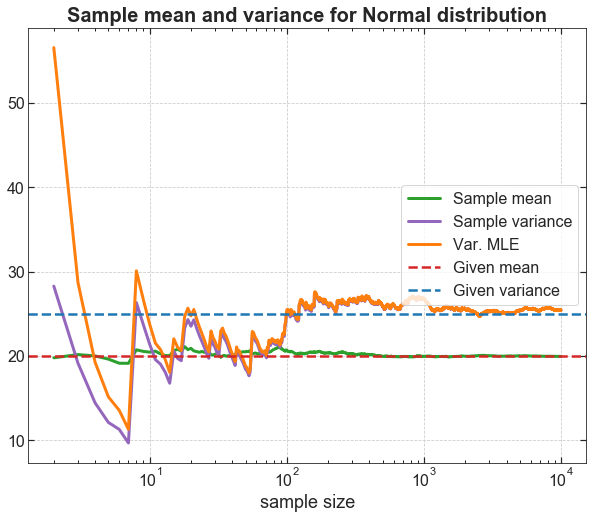

In [11]:
nrows = 1
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*10, nrows*8))

axistitlesize = 20
axislabelsize = 18
axisticksize = 16
axislegendsize = 16

axes.set_xscale('log')

axes.plot(x, mean_list, color='tab:green', lw=3, label='Sample mean')
axes.plot(x, var_list, color='tab:purple', lw=3, label='Sample variance')
axes.plot(x, var_alt_list, color='tab:orange', lw=3, label='Var. MLE')

axes.axhline(y=mu, color='tab:red', ls='--', lw=2.5, label='Given mean')
axes.axhline(y=sigma**2, color='tab:blue', ls='--', lw=2.5, label='Given variance')

axes.set_title('Sample mean and variance for Normal distribution', fontsize=axistitlesize, fontweight='bold')
axes.set_xlabel('sample size', fontsize=axislabelsize)
axes.tick_params(axis='both', which='major', labelsize=axisticksize)

axes.legend(loc='center right', fontsize=axislegendsize)

plt.show()

Let's try out the same for a Pareto (Lomax) distribution as well!

In [32]:
num_points = 10000

In [33]:
# TRY DIFFERENT SHAPE PARAMETERS
params = [3.5, 2.5, 1.5, 0.5]
pareto_data = [np.random.pareto(p, num_points) for p in params]

In [34]:
x = np.arange(2, num_points+1)
mean_list = [[np.mean(pareto_data[n][:i]) for i in x] for n in range(0, len(pareto_data))]
var_list = [[np.var(pareto_data[n][:i], ddof=0.0) for i in x] for n in range(0, len(pareto_data))]     # ddof = 0.0
var_alt_list = [[np.var(pareto_data[n][:i], ddof=1.0) for i in x] for n in range(0, len(pareto_data))] # ddof = 1.0

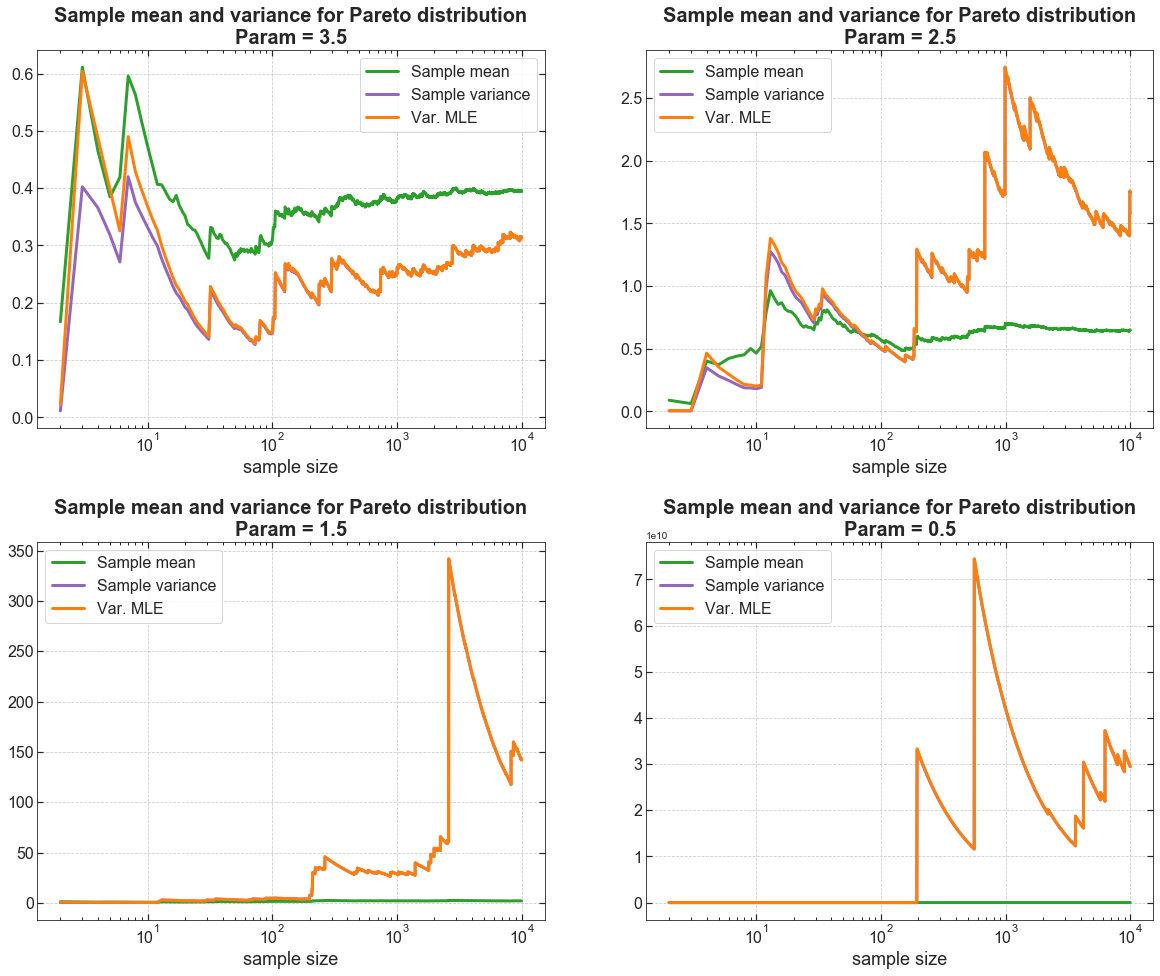

In [39]:
nrows = 2
ncols = 2
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*10, nrows*8))
fig.subplots_adjust(hspace=0.3)

axistitlesize = 20
axislabelsize = 18
axisticksize = 16
axislegendsize = 16

for i in range(nrows):
    for j in range(ncols):
        axes[i][j].set_xscale('log')

        axes[i][j].plot(x, mean_list[i*ncols + j], color='tab:green', lw=3, label='Sample mean')
        axes[i][j].plot(x, var_list[i*ncols + j], color='tab:purple', lw=3, label='Sample variance')
        axes[i][j].plot(x, var_alt_list[i*ncols + j], color='tab:orange', lw=3, label='Var. MLE')

        #axes[i][j].axhline(y=params[i * ncols + j], color='tab:red', ls='--', lw=2.5, label='Given parameter')

        axes[i][j].set_title('Sample mean and variance for Pareto distribution\nParam = {0}'.format(params[i*ncols + j]),
                             fontsize=axistitlesize, fontweight='bold')
        axes[i][j].set_xlabel('sample size', fontsize=axislabelsize)
        axes[i][j].tick_params(axis='both', which='major', labelsize=axisticksize)

        axes[i][j].legend(loc='best', fontsize=axislegendsize)

plt.show()

Let us repeat the above with data that was drawn from Cauchy distribution!

In [40]:
cauchy_data = np.random.standard_cauchy(num_points)

In [41]:
x = np.arange(2, num_points+1)
mean_list = [np.mean(cauchy_data[:i]) for i in x]
var_list = [np.var(cauchy_data[:i], ddof=0.0) for i in x]     # ddof = 0.0
var_alt_list = [np.var(cauchy_data[:i], ddof=1.0) for i in x] # ddof = 1.0

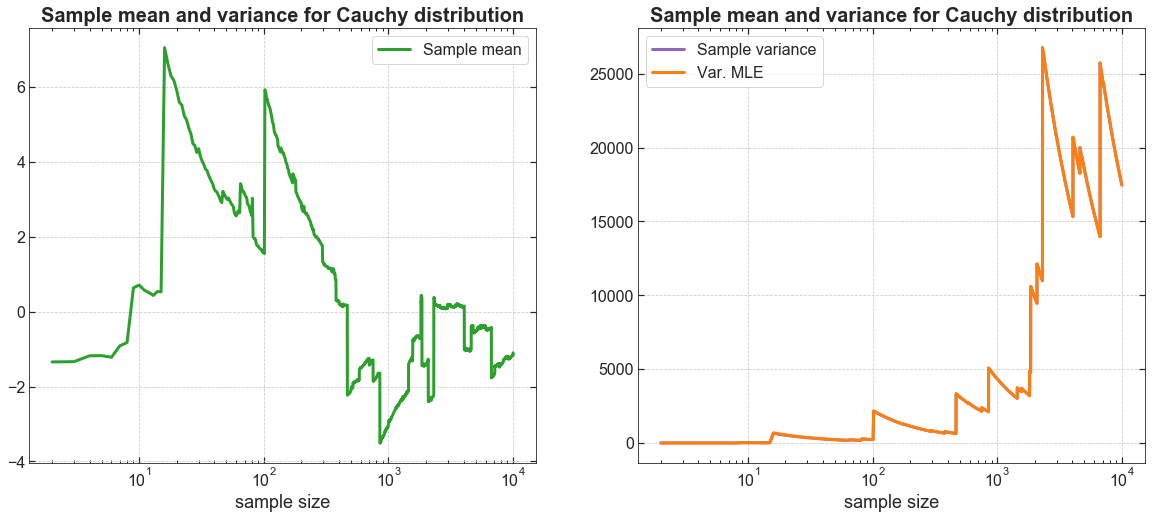

In [42]:
nrows = 1
ncols = 2
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*10, nrows*8))

axistitlesize = 20
axislabelsize = 18
axisticksize = 16
axislegendsize = 16

axes[0].plot(x, mean_list, color='tab:green', lw=3, label='Sample mean')
axes[1].plot(x, var_list, color='tab:purple', lw=3, label='Sample variance')
axes[1].plot(x, var_alt_list, color='tab:orange', lw=3, label='Var. MLE')

for i in range(ncols):
    axes[i].set_xscale('log')

    axes[i].set_title('Sample mean and variance for Cauchy distribution', fontsize=axistitlesize, fontweight='bold')
    axes[i].set_xlabel('sample size', fontsize=axislabelsize)
    axes[i].tick_params(axis='both', which='major', labelsize=axisticksize)

    axes[i].legend(loc='best', fontsize=axislegendsize)

plt.show()

## Simulating the stock market

A very simple model of a fluctuating stock value is the following: In every time step its value is either increased by 1 cent, or is decreased by 1 cent with equal probabilities.

Let's simulate this simply by drawing a random sequence of 1 and -1, and summing the obtained values. 

First we define the number of stocks, and the number of time steps.

In [43]:
num_stocks = 3
num_time_steps = 10000

We are going to put the generated time sequences of the stocks into a list.

In [58]:
stock_time_series = np.zeros((num_stocks, num_time_steps))
for i in range(0, num_time_steps-1):
    for n in range(0, num_stocks):
        # Random -1 and 1 dollars
        rand_change = np.random.choice([-1,1])
        # Add the current value to the array
        stock_time_series[n][i+1] = stock_time_series[n][i] + rand_change

Let's make actually two plots: 
- first only up to the first 1000 time steps,
- next all the way up to 10000 time steps (and highlight within the area shown in the previous figure)

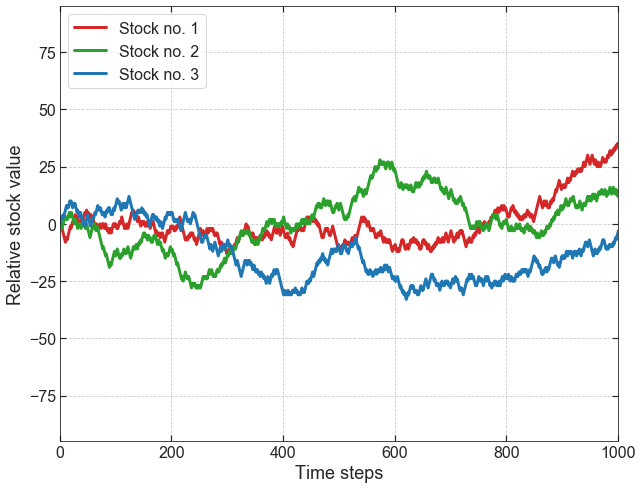

In [65]:
nrows = 1
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*10, nrows*8))

axistitlesize = 20
axislabelsize = 18
axisticksize = 16
axislegendsize = 16

colors = [
    'tab:red',
    'tab:green',
    'tab:blue'
]

for n in range(0, num_stocks):
    axes.plot(stock_time_series[n], c=colors[n], lw=3,
              label='Stock no. {0}'.format(n+1))

axes.set_xlim(0, 1000)
axes.set_ylim(-95, 95)
    
axes.set_xlabel('Time steps', fontsize=axislabelsize)
axes.set_ylabel('Relative stock value', fontsize=axislabelsize)
axes.tick_params(axis='both', which='major', labelsize=axisticksize)

axes.legend(loc= 'upper left',fontsize=axislegendsize)

plt.show()

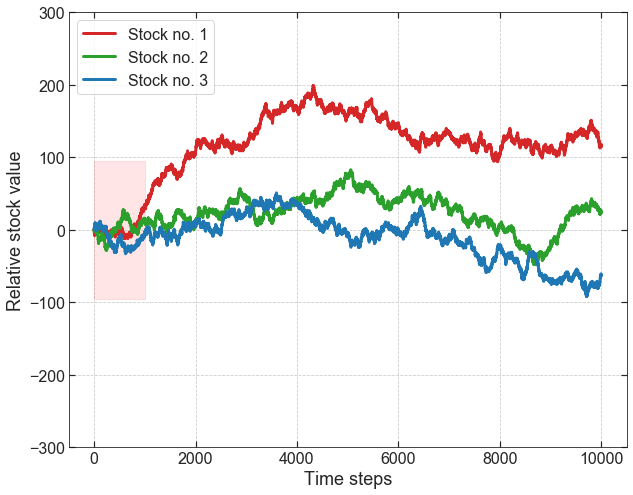

In [66]:
nrows = 1
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*10, nrows*8))

axistitlesize = 20
axislabelsize = 18
axisticksize = 16
axislegendsize = 16

colors = [
    'tab:red',
    'tab:green',
    'tab:blue'
]

for n in range(0, num_stocks):
    axes.plot(stock_time_series[n], c=colors[n], lw=3,
              label='Stock no. {0}'.format(n+1))

rect = patches.Rectangle(xy=(0,-95), width=1000, height=190,
                         edgecolor='red', facecolor='red', alpha=0.1)
axes.add_patch(rect)
    
axes.set_ylim(-300, 300)
    
axes.set_xlabel('Time steps', fontsize=axislabelsize)
axes.set_ylabel('Relative stock value', fontsize=axislabelsize)
axes.tick_params(axis='both', which='major', labelsize=axisticksize)

axes.legend(loc= 'upper left',fontsize=axislegendsize)

plt.show()

- Observe that the two figures look quite similar. (More on that on the Fractals course).
- ** What do you think, how was the vertical scale (set by ylim) chosen? **
- Try out changing the scale of the first figure to see that it does not look similar to the 2nd if the horisontal - vertical scales are not "properly" set.